In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

data_dir = '/content/drive/MyDrive/DATA-4380/Vision Project/raw'
files = os.listdir(data_dir)
print("Total images found:", len(files))
print("Example filenames:", files[:5])


Total images found: 10157
Example filenames: ['36_1_0_20170108230047374.jpg', '48_0_0_20170109012405234.jpg', '36_1_0_20170108224009217.jpg', '37_0_0_20170109015606661.jpg', '26_1_4_20170109002629914.jpg']


In [ ]:
import pandas as pd

valid_classes = [0, 1, 2, 3, 4]
data = []

for file in files:
    try:
        age, gender, race, _ = file.split("_", 3)
        race = int(race)
        if race in valid_classes:
            data.append({"filename": file, "race": race})
    except:
        continue

df = pd.DataFrame(data)
print("Filtered image count:", len(df))

# Sample ≤100 images per class
subset_df = df.groupby("race").apply(lambda x: x.sample(n=min(100, len(x)), random_state=42))
subset_df.reset_index(drop=True, inplace=True)
print(subset_df['race'].value_counts())


Filtered image count: 10155
race
0    100
1    100
2    100
3    100
4    100
Name: count, dtype: int64


/tmp/ipython-input-3-3525632696.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  subset_df = df.groupby("race").apply(lambda x: x.sample(n=min(100, len(x)), random_state=42))


In [ ]:
import shutil

output_base = '/content/utk_subset'
os.makedirs(output_base, exist_ok=True)

for race in valid_classes:
    os.makedirs(os.path.join(output_base, str(race)), exist_ok=True)

for _, row in subset_df.iterrows():
    src = os.path.join(data_dir, row['filename'])
    dst = os.path.join(output_base, str(row['race']), row['filename'])
    shutil.copy(src, dst)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=15
)

train_generator = datagen.flow_from_directory(
    output_base,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    output_base,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation',
    shuffle=False
)


Found 400 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


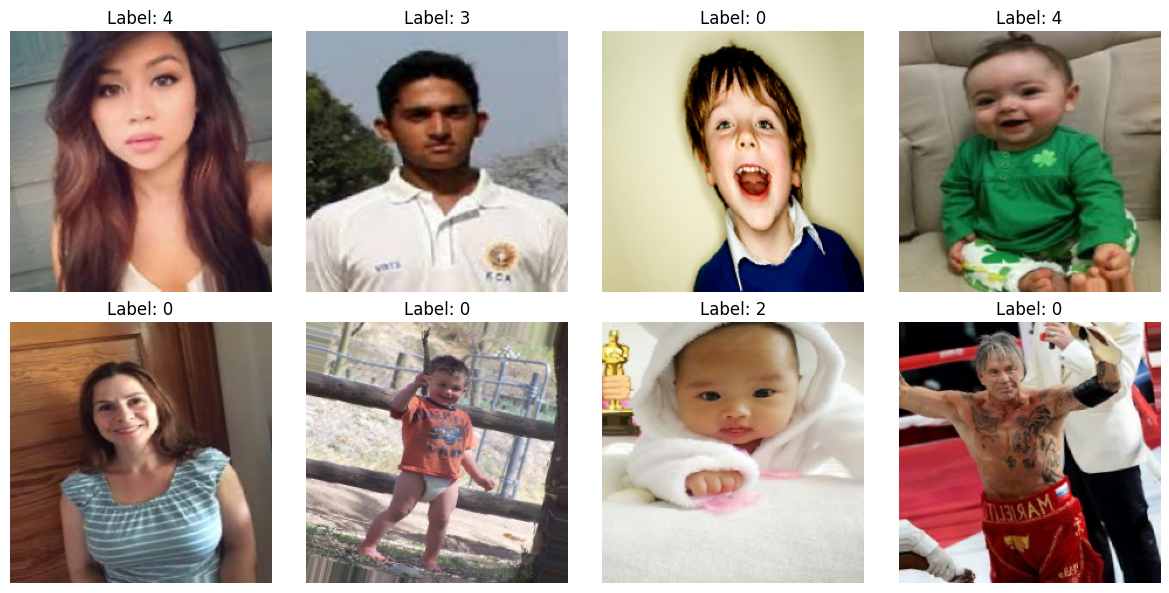

In [ ]:
import matplotlib.pyplot as plt

images, labels = next(train_generator)

plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i])
    plt.title(f"Label: {int(labels[i])}")
    plt.axis("off")
plt.tight_layout()
plt.show()
